In [5]:
from qiskit import QuantumRegister
from qiskit import QuantumCircuit
from qiskit import Aer
from qiskit import ClassicalRegister,  transpile
from qiskit.visualization import plot_histogram
import numpy as np
from qiskit import BasicAer
import random
import math
from qiskit import BasicAer, execute
import statistics
import qiskit
from qiskit import assemble, transpile
from qiskit.providers.aer.noise import NoiseModel
import qiskit.providers.aer.noise as noise
from qiskit.providers.aer.noise import (NoiseModel, QuantumError, ReadoutError,
    pauli_error, depolarizing_error, thermal_relaxation_error)

from qiskit.ignis.mitigation.measurement import (complete_meas_cal, tensored_meas_cal,
                                                 CompleteMeasFitter, TensoredMeasFitter)
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter



{'0001': 1030, '1101': 1072, '0011': 1028, '1111': 999, '1110': 1031, '1100': 1020, '0000': 985, '0010': 1027}
{'00': 4070, '01': 0, '10': 0, '11': 4122}


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/qiskit/visualization/counts_visualization.py:226: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(14)


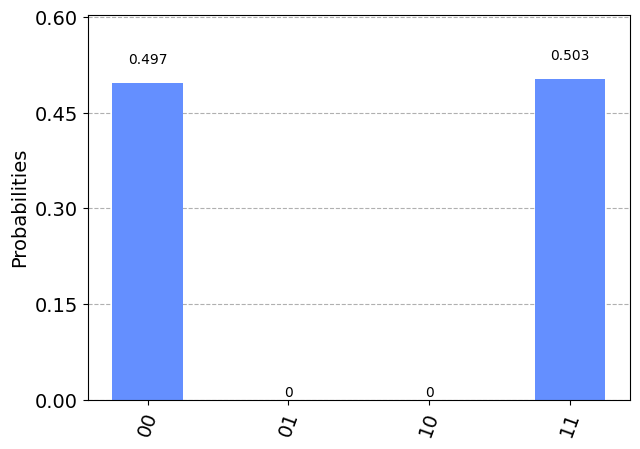

In [16]:
qr = QuantumRegister(4,'a')
cr = ClassicalRegister(4,'creg')
qc = QuantumCircuit(qr,cr)
qc.h(qr[0])
#qc.x(qr[3])
qc.h(qr[1])
qc.cx(qr[1],qr[2])
qc.cx(qr[0],qr[1])
qc.cx(qr[2],qr[3])
qc.h(qr[2])
qc.measure(1,0)
qc.measure(2,1)
qc.x(qr[3]).c_if(cr[0], 1)
qc.z(qr[0]).c_if(cr[1], 1)
#non local CNOT gate - simulation
qc.measure([0, 3], [2,3])
aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(qc, shots=8192)
hist = job.result().get_counts()
print(hist)
plot_histogram(hist)
#Histogram for the first two qubits 
a_00 = []
a_01 = []
a_10 = []
a_11 = []
key = list(hist.keys())
val = list(hist.values())
for i in range(len(key)):
    if '11' in key[i][0:2]:
        a_11.append(val[i])
    elif '00' in key[i][0:2]:
        a_00.append(val[i])
    elif '01' in key[i][0:2]:
        a_01.append(val[i])
    elif '10' in key[i][0:2]:
        a_10.append(val[i])
dict = {}
dict['00'] = sum(a_00)
dict['01'] = sum(a_10)
dict['10'] = sum(a_01)
dict['11'] = sum(a_11)
print(dict)
plot_histogram(dict)

{'00': 498, '11': 262, '01': 264}
{'00': 498, '01': 0, '10': 264, '11': 262}


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/qiskit/visualization/counts_visualization.py:226: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(14)


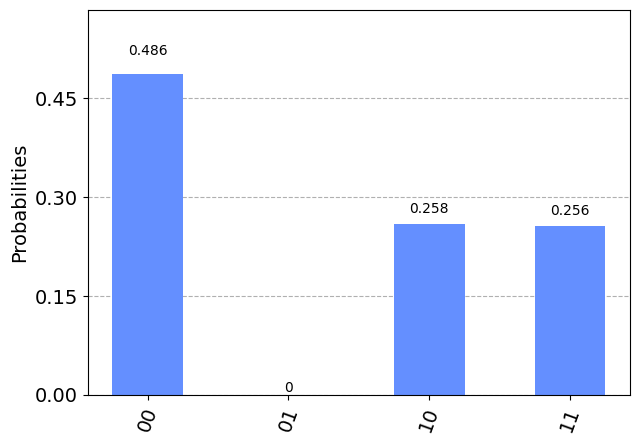

In [3]:
backend = BasicAer.get_backend('unitary_simulator')
qr = QuantumRegister(2,'a')
cr = ClassicalRegister(2,'creg')
qc = QuantumCircuit(qr,cr)
qc.h(qr[0])
qc.cu(np.pi/2, np.pi/2, np.pi/2, 0, qr[0], qr[1])
qc.measure([0, 1], [0,1])
backend = BasicAer.get_backend('qasm_simulator')
job = backend.run(transpile(qc, backend))
hist = job.result().get_counts(qc)
print(hist)
plot_histogram(hist)
#Histogram for the first two qubits 
a_00 = []
a_01 = []
a_10 = []
a_11 = []
key = list(hist.keys())
val = list(hist.values())
for i in range(len(key)):
    if '11' in key[i][0:2]:
        a_11.append(val[i])
    elif '00' in key[i][0:2]:
        a_00.append(val[i])
    elif '01' in key[i][0:2]:
        a_01.append(val[i])
    elif '10' in key[i][0:2]:
        a_10.append(val[i])
dict = {}
dict['00'] = sum(a_00)
dict['01'] = sum(a_10)
dict['10'] = sum(a_01)
dict['11'] = sum(a_11)
print(dict)
plot_histogram(dict)

{'1110': 515, '1111': 518, '1101': 532, '0100': 469, '1100': 497, '0011': 980, '0001': 1078, '0110': 500, '0111': 531, '0000': 1026, '0010': 1034, '0101': 512}
{'00': 4118, '01': 0, '10': 2012, '11': 2062}


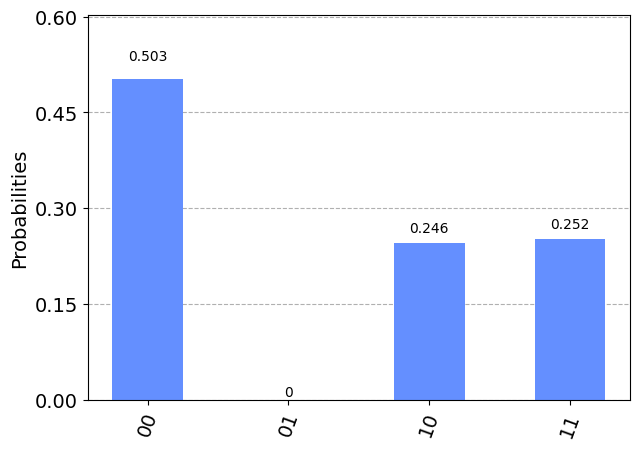

In [4]:
qr = QuantumRegister(4,'a')
cr = ClassicalRegister(4,'creg')
qc = QuantumCircuit(qr,cr)
qc.h(qr[0])
#qc.x(qr[3])
qc.h(qr[1])
qc.cx(qr[1],qr[2])
qc.cx(qr[0],qr[1])
qc.measure(qr[1],0)
qc.x(qr[2]).c_if(cr[0], 1)
qc.cu(np.pi/2, np.pi/2, np.pi/2, 0, qr[2], qr[3])
qc.h(qr[2])
qc.measure(2,1)
qc.z(qr[0]).c_if(cr[1], 1)
#non local CNOT gate - simulation
qc.measure([0, 3], [2,3])
aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(qc, shots=8192)
hist = job.result().get_counts()
print(hist)
plot_histogram(hist)
#Histogram for the first two qubits 
a_00 = []
a_01 = []
a_10 = []
a_11 = []
key = list(hist.keys())
val = list(hist.values())
for i in range(len(key)):
    if '11' in key[i][0:2]:
        a_11.append(val[i])
    elif '00' in key[i][0:2]:
        a_00.append(val[i])
    elif '01' in key[i][0:2]:
        a_01.append(val[i])
    elif '10' in key[i][0:2]:
        a_10.append(val[i])
dict = {}
dict['00'] = sum(a_00)
dict['01'] = sum(a_10)
dict['10'] = sum(a_01)
dict['11'] = sum(a_11)
print(dict)
plot_histogram(dict)

Cost function is 8.701000000000001e-05
Time taken for the quantum circuit 7.91e-06 s
Number of steps for entanglement generation is 3
The implementation has been completed


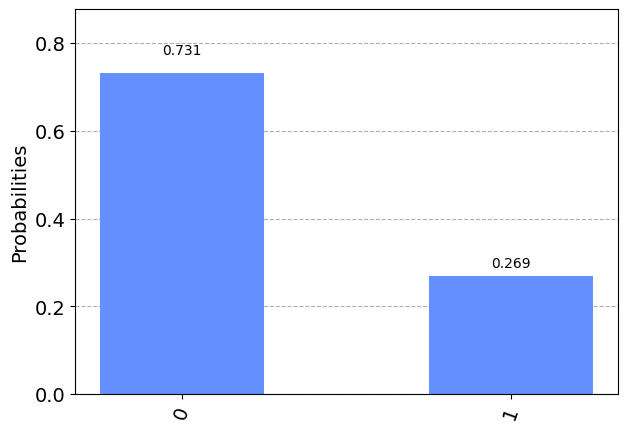

In [18]:
def nonlocal_gate(qc, ctrl_qubit, target_qubit, comm_1, comm_2, theta,p):
    k = 1
    n = 0
    while k!=0:
        p_random = np.average(random.sample(range(1, 100), 3))/100
        n = n+1
        if p>p_random:
            qc.h(comm_1)
            qc.cx(comm_1,comm_2)
            k=0
    qc.cx(ctrl_qubit,comm_1)
    qc.measure(comm_1,0)
    qc.x(comm_2).c_if(cr[0], 1)
    qc.cu(theta,0,0,0,comm_2, target_qubit)
    qc.h(comm_2)
    qc.measure(comm_2,1)
    qc.z(ctrl_qubit).c_if(cr[1], 1)
    qc.reset(qr[7])
    qc.reset(qr[8])
    return qc,n
qr = QuantumRegister(9,'a')
cr = ClassicalRegister(2,'creg')
qc = QuantumCircuit(qr,cr)
num_shots = 10000
dist = 0.1
latt = 20
c = 2*1e5
pc = 0.9
p = 0.5*(pc**2)* math.exp(-dist/latt)
t_meas = 1e-7
t_cnot = 1e-7
t_cu = 1e-7
t_local = 1e-8
theta = [np.pi/8, np.pi/4, np.pi/2, -np.pi/4, np.pi/2, np.pi, np.pi/2, np.pi/2]
for i in range(0,7):
    qc.ry(theta[i],qr[i])
n_turns = 0
for i in range(0,6):
    qc,n = nonlocal_gate(qc, qr[i], qr[6], qr[7], qr[8],theta[i],p)
    n_turns = n_turns+n
qc.measure(6,0)
job = execute(qc, BasicAer.get_backend('qasm_simulator'), shots=num_shots) 
hist = job.result().get_counts()
a_0 = []
a_1 = []
key = list(hist.keys())
val = list(hist.values())
for i in range(len(key)):
    if '1' in key[i][1]:
        a_1.append(val[i])
    elif '0' in key[i][1]:
        a_0.append(val[i])
hist={}
hist['0'] = sum(a_0)
hist['1'] = sum(a_1) 
gates = dict(qc.count_ops())
num_1 = []
num_2 = []
num_3 = []
for key in gates.keys():
    if key in ['h','x','y','z','ry','rx','rz','u']:
        num_1.append(gates[key])
    elif key in ['cx','cz','cu']:
        num_2.append(gates[key])
    elif key in ['measure']:
        num_3.append(gates[key])
num_1 = sum(num_1)
num_2 = sum(num_2)
num_3 = sum(num_3)
time_qc = (num_1*t_local + num_2*t_cu + num_3*t_meas)+3*(n*dist/c)
p_10 = hist['0']/num_shots
p_11 = hist['1']/num_shots
num_qubits = 11
cost_function = num_qubits*time_qc
print("Cost function is",cost_function)
print("Time taken for the quantum circuit", time_qc, "s")
print("Number of steps for entanglement generation is",n)
print("The implementation has been completed")
plot_histogram(hist)

Cost function is 7.051e-05
Time taken for the quantum circuit 6.41e-06 s
Number of steps for entanglement generation is 2
The implementation has been completed
The average fidelity of the state obtained is  0.9990351664400379


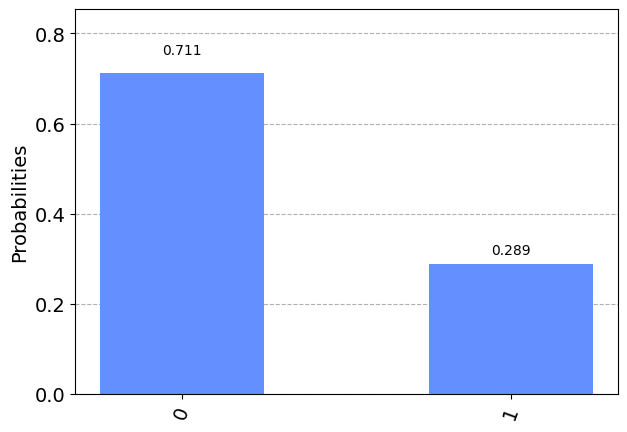

In [23]:
p1Q = 0.001 #single qubit gate error
p2Q = 0.01 #two qubit gate error
def nonlocal_gate(qc, ctrl_qubit, target_qubit, comm_1, comm_2, theta,p):
    k = 1
    n = 0
    while k!=0:
        p_random = np.average(random.sample(range(1, 100), 3))/100
        n = n+1
        if p>p_random:
            qc.h(comm_1)
            qc.cx(comm_1,comm_2)
            k=0
    qc.cx(ctrl_qubit,comm_1)
    qc.measure(comm_1,0)
    qc.x(comm_2).c_if(cr[0], 1)
    qc.cu(theta,0,0,0,comm_2, target_qubit)
    qc.h(comm_2)
    qc.measure(comm_2,1)
    qc.z(ctrl_qubit).c_if(cr[1], 1)
    qc.reset(qr[7])
    qc.reset(qr[8])
    return qc,n

qr = QuantumRegister(9,'a')
cr = ClassicalRegister(2,'creg')
qc = QuantumCircuit(qr,cr)

theta = [np.pi/8, np.pi/4, np.pi/2, -np.pi/4, np.pi/2, np.pi, np.pi/2, np.pi/2]
for i in range(0,7):
    qc.ry(theta[i],qr[i])
n_turns = 0
for i in range(0,6):
    qc,n = nonlocal_gate(qc, qr[i], qr[6], qr[7], qr[8],theta[i],p)
    n_turns = n_turns+n
qc.measure(6,0)
error_1 = noise.depolarizing_error(p1Q, 1)
error_2 = noise.depolarizing_error(p2Q, 2)
noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error_1, ['x','z','h','ry'])
noise_model.add_all_qubit_quantum_error(error_2, ['cx','cu'])
error_gate1 = pauli_error([('X',p2Q), ('I', 1 - p2Q)])
error_gate2 = error_gate1.tensor(error_gate1)
error_reset = pauli_error([('X', p1Q), ('I', 1 - p1Q)])
error_meas = pauli_error([('X',p1Q), ('I', 1 - p1Q)])
noise_model.add_all_qubit_quantum_error(error_reset, "reset")
noise_model.add_all_qubit_quantum_error(error_meas, "measure")
basis_gates = noise_model.basis_gates
result = execute(qc, Aer.get_backend('qasm_simulator'),
                     basis_gates=basis_gates,
                     noise_model=noise_model, shots=num_shots).result().get_counts(0)
a_0 = []
a_1 = []
key = list(result.keys())
val = list(result.values())
for i in range(len(key)):
    if '1' in key[i][1]:
        a_1.append(val[i])
    elif '0' in key[i][1]:
        a_0.append(val[i])
hist={}
hist['0'] = sum(a_0)
hist['1'] = sum(a_1) 
prob_20 = hist['0']/num_shots
prob_21 = hist['1']/num_shots
gates = dict(qc.count_ops())
num_1 = []
num_2 = []
num_3 = []
for key in gates.keys():
    if key in ['h','x','y','z','ry','rx','rz','u']:
        num_1.append(gates[key])
    elif key in ['cx','cz','cu']:
        num_2.append(gates[key])
    elif key in ['measure']:
        num_3.append(gates[key])
num_1 = sum(num_1)
num_2 = sum(num_2)
num_3 = sum(num_3)
time_qc = (num_1*t_local + num_2*t_cu + num_3*t_meas)+3*(n*dist/c)
p_20 = hist['0']/num_shots
p_21 = hist['1']/num_shots
num_qubits = 11
cost_function = num_qubits*time_qc
print("Cost function is",cost_function)
print("Time taken for the quantum circuit", time_qc, "s")
print("Number of steps for entanglement generation is",n)
print("The implementation has been completed")
F = ((p_10*p_20) + (p_11*p_21) + 2*math.sqrt(p_10*p_11*p_20*p_21))**2
print("The average fidelity of the state obtained is ",F)
plot_histogram(hist)